In [1]:
from google.colab import files
file=files.upload()

Saving 2015.csv to 2015.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv("2015.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

<ipython-input-23-3f0abb1c0396>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Economy (GDP per Capita)', data=highest_gdp_countries, palette=colors)


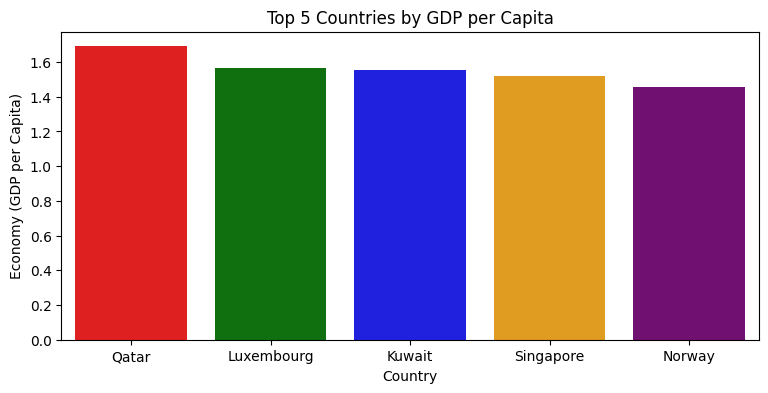

In [23]:
#Which country has the highest GDP per Capita?
highest_gdp_countries = data[['Country', 'Economy (GDP per Capita)']].sort_values(by='Economy (GDP per Capita)', ascending=False).head(5)
plt.figure(figsize=(9, 4))
colors = ['red', 'green', 'blue', 'orange', 'purple']
sns.barplot(x='Country', y='Economy (GDP per Capita)', data=highest_gdp_countries, palette=colors)
plt.title('Top 5 Countries by GDP per Capita')
plt.xlabel('Country')
plt.ylabel('Economy (GDP per Capita)')
plt.show()



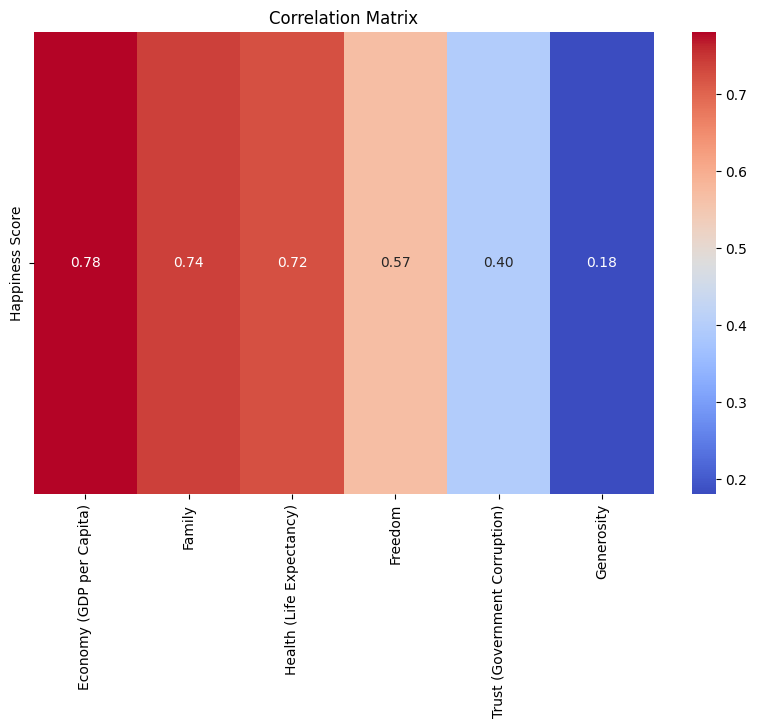

In [7]:
# Factors Influencing Happiness Scores
corr_matrix = data[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Happiness Score']].corr()
happiness_corr = corr_matrix.loc[['Happiness Score'], ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
plt.figure(figsize=(10, 6))
sns.heatmap(happiness_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


<ipython-input-8-e252b9d2dc0b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_scores.index, y=average_scores.values,palette='viridis')


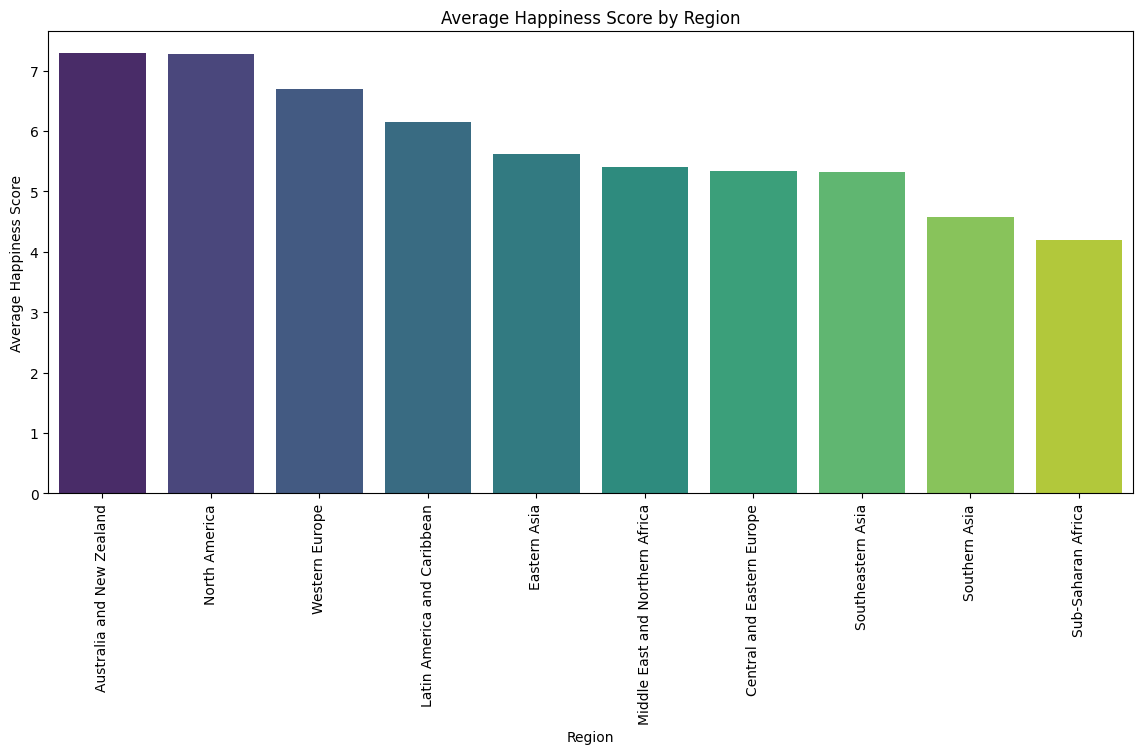

In [8]:
# Regional Happiness Disparities
average_scores = data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x=average_scores.index, y=average_scores.values,palette='viridis')
plt.xlabel("Region")
plt.ylabel("Average Happiness Score")
plt.title("Average Happiness Score by Region")
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='Economy (GDP per Capita)', ylabel='Family'>

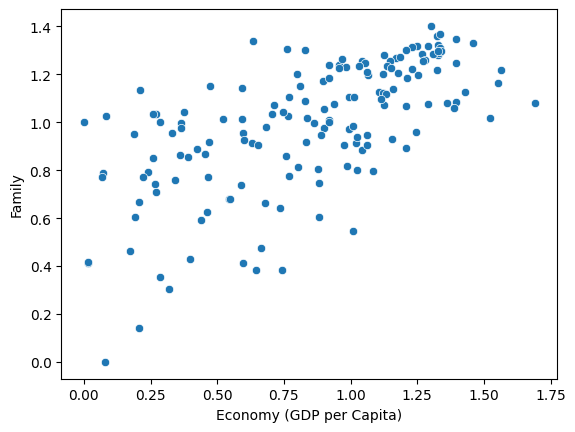

In [13]:
#relationship between a country's GDP per capita and Family
sns.scatterplot(x=data['Economy (GDP per Capita)'],y=data['Family'])

<ipython-input-24-725d6c9b284a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dystopia Residual', y='Country', data=data_sorted, palette='Set1')


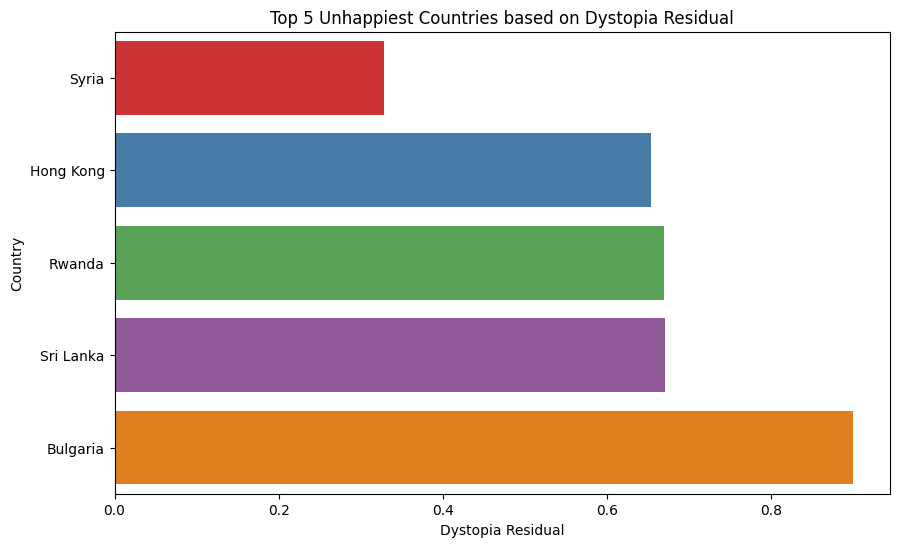

In [24]:
# the countries where people is very unhappy
data_sorted = data.sort_values(by='Dystopia Residual').head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='Dystopia Residual', y='Country', data=data_sorted, palette='Set1')
plt.title("Top 5 Unhappiest Countries based on Dystopia Residual")
plt.show()

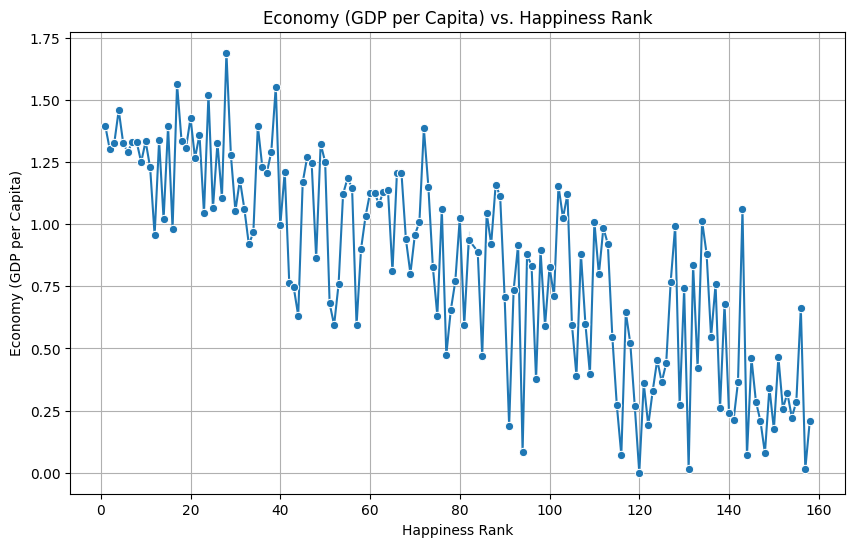

In [142]:
#Economy (GDP per Capita) vs. Happiness Rank
plt.figure(figsize=(10, 6))
sns.lineplot(x='Happiness Rank', y='Economy (GDP per Capita)', data=data, marker='o')
plt.title('Economy (GDP per Capita) vs. Happiness Rank')
plt.grid(True)
plt.show()

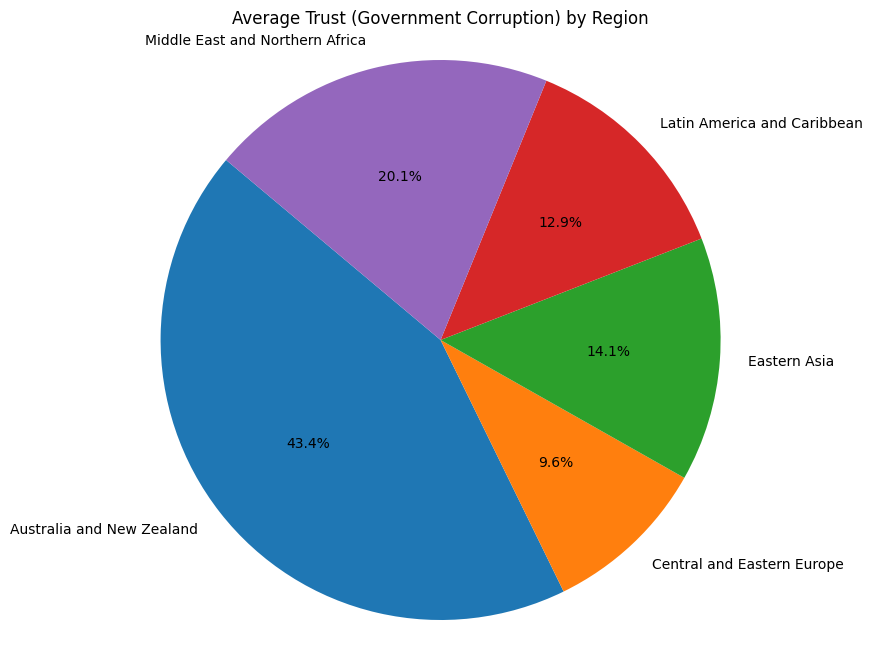

In [31]:
#trust and region pie chart

Trust=data.groupby('Region')['Trust (Government Corruption)'].mean().head()
plt.figure(figsize=(10, 8))
plt.pie(Trust, labels=Trust.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Trust (Government Corruption) by Region')
plt.show()
